In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [41]:
HCAHPS_2020 =pd.read_csv("HCAHPS2020 - Hospital.csv")
HCAHPS_2021 =pd.read_csv("HCAHPS-Hospital2021.csv")
HCAHPS_2022 =pd.read_csv("HCAHPS-Hospital2022.csv")
HCAHPS_2023 =pd.read_csv("HCAHPS-Hospital2023.csv")
HCAHPS_2024 =pd.read_csv("HCAHPS-Hospital2024.csv")

hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156, 230222, 231320, 233300, 230059, 231322 ,231322, 233300]
HCAHPS_dfs = [HCAHPS_2020, HCAHPS_2021, HCAHPS_2022, HCAHPS_2023, HCAHPS_2024]

/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_18684/3408167374.py:1: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HCAHPS_2020 =pd.read_csv("HCAHPS2020 - Hospital.csv")
/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_18684/3408167374.py:2: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HCAHPS_2021 =pd.read_csv("HCAHPS-Hospital2021.csv")
/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_18684/3408167374.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  HCAHPS_2022 =pd.read_csv("HCAHPS-Hospital2022.csv")
/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_18684/3408167374.py:4: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HCAHPS_2023 =pd.read_csv("HCAHPS-Hospital2023.csv")
/var/folders/rq/8sjqg4h

In [42]:
## Steps to check the matching columns informations

# Creating a dictionary of columns for each dataframe
columns_dict = {f"Year_{i+1}": set(df.columns) for i, df in enumerate(HCAHPS_dfs)}

# Printing the columns for each year
for year, cols in columns_dict.items():
    print(f"{year} columns:")
    print(cols)
    print("-" * 50)

# Finding common columns across all dataframes
common_cols = set.intersection(*columns_dict.values())
print("✅ Common columns across all DataFrames:")
print(common_cols)

# Finding columns that are unique/missing in each
for year, cols in columns_dict.items():
    missing = common_cols.symmetric_difference(cols)
    if missing:
        print(f"⚠️ Columns needing attention in {year}: {missing}")


Year_1 columns:
{'HCAHPS Linear Mean Value', 'HCAHPS Answer Description', 'HCAHPS Measure ID', 'Patient Survey Star Rating Footnote', 'Address', 'HCAHPS Answer Percent Footnote', 'Survey Response Rate Percent', 'End Date', 'ZIP Code', 'Start Date', 'HCAHPS Question', 'Survey Response Rate Percent Footnote', 'Phone Number', 'Number of Completed Surveys Footnote', 'Patient Survey Star Rating', 'County Name', 'Facility Name', 'State', 'HCAHPS Answer Percent', 'Number of Completed Surveys', 'City', 'Facility ID'}
--------------------------------------------------
Year_2 columns:
{'HCAHPS Linear Mean Value', 'HCAHPS Answer Description', 'HCAHPS Measure ID', 'Patient Survey Star Rating Footnote', 'Address', 'HCAHPS Answer Percent Footnote', 'Survey Response Rate Percent', 'End Date', 'ZIP Code', 'Start Date', 'HCAHPS Question', 'Survey Response Rate Percent Footnote', 'Phone Number', 'Number of Completed Surveys Footnote', 'Patient Survey Star Rating', 'County Name', 'Facility Name', 'State'

/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_18684/3179960312.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HCAHPS Answer Percent'] = df['HCAHPS Answer Percent'].replace(['Not Applicable', 'Not Available'], np.nan)
/var/folders/rq/8sjqg4hj3k99cfwf49v9_dlc0000gn/T/ipykernel_18684/3179960312.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HCAHPS Linear Mean Value'] = df['HCAHPS Linear Mean Value'].replace(['Not Applicable', 'Not Available'], np.nan)
/var/folders/rq/8sjqg4hj3k

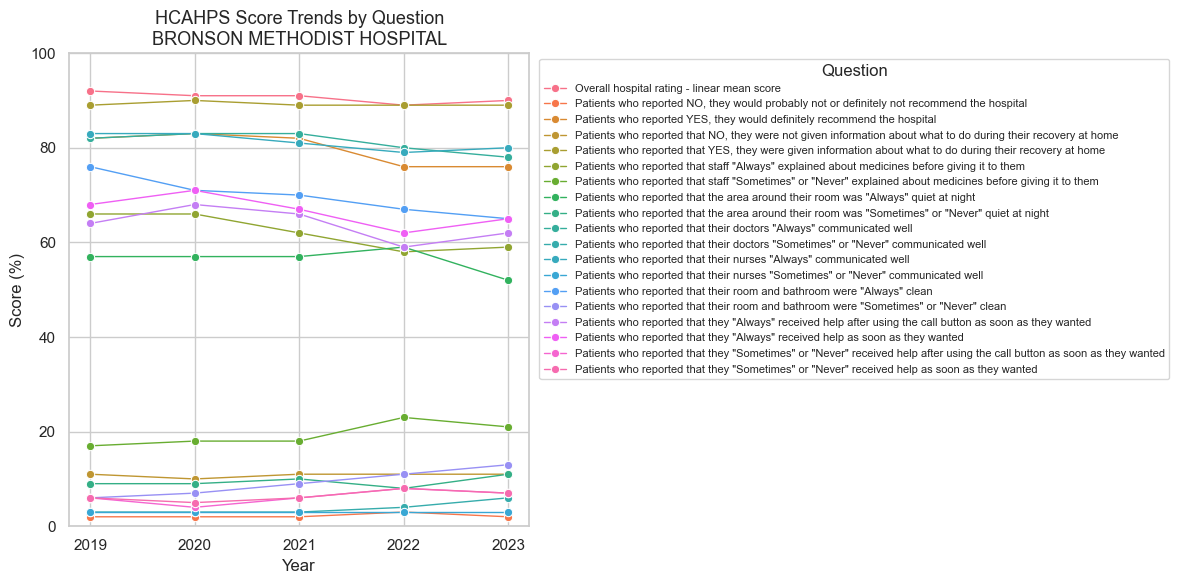

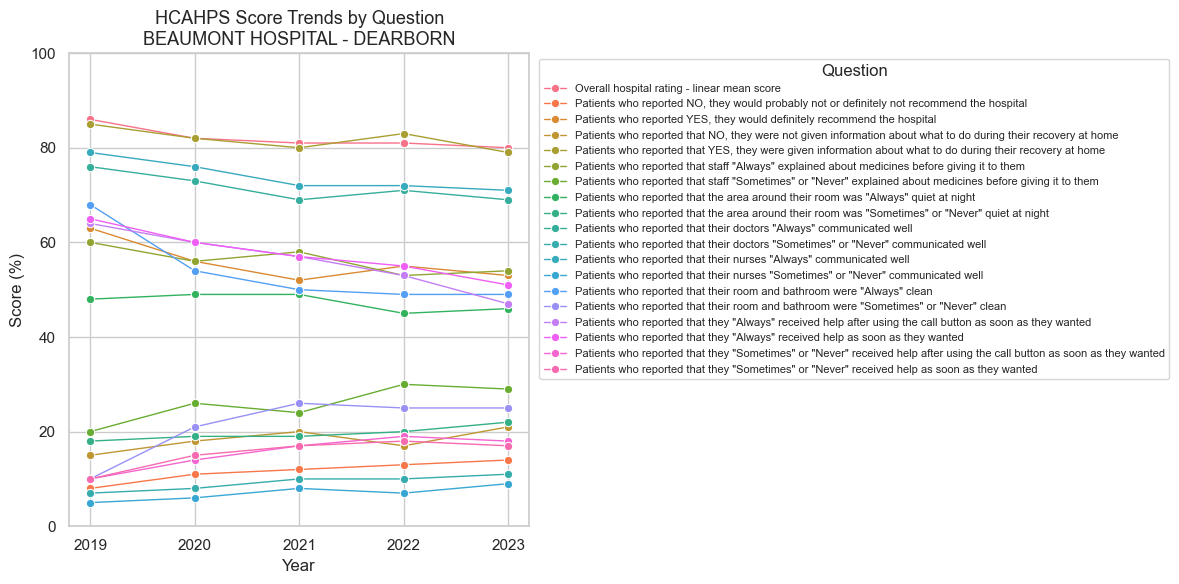

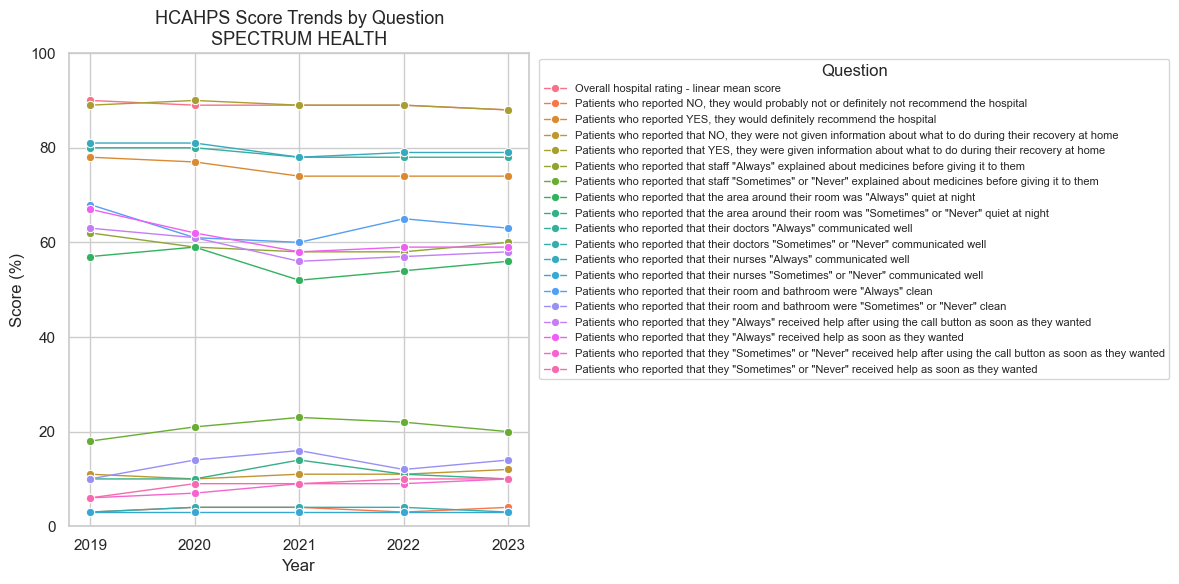

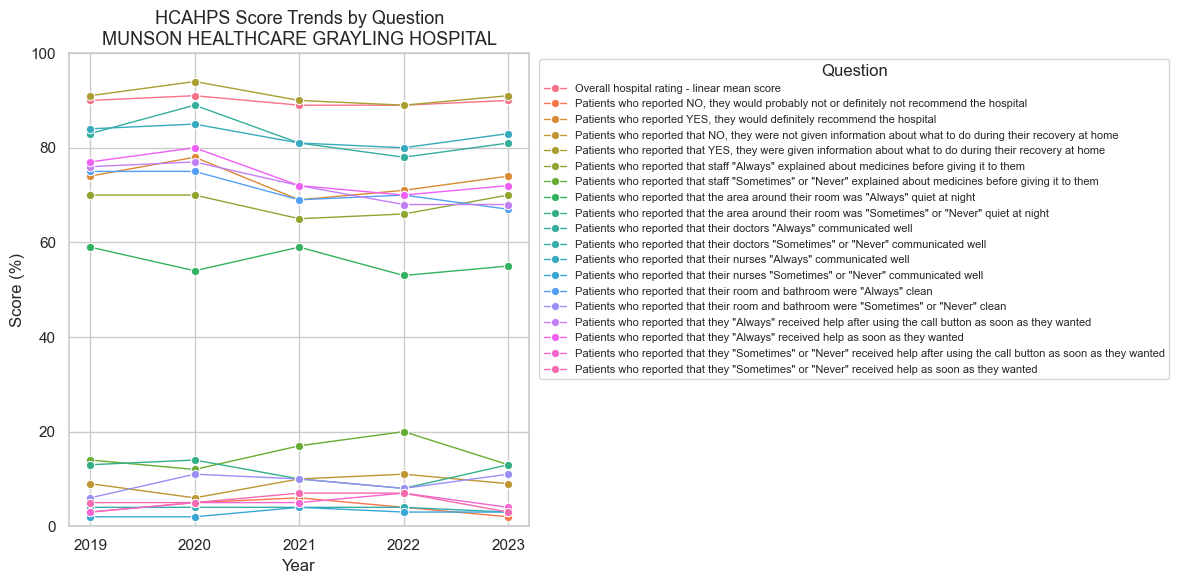

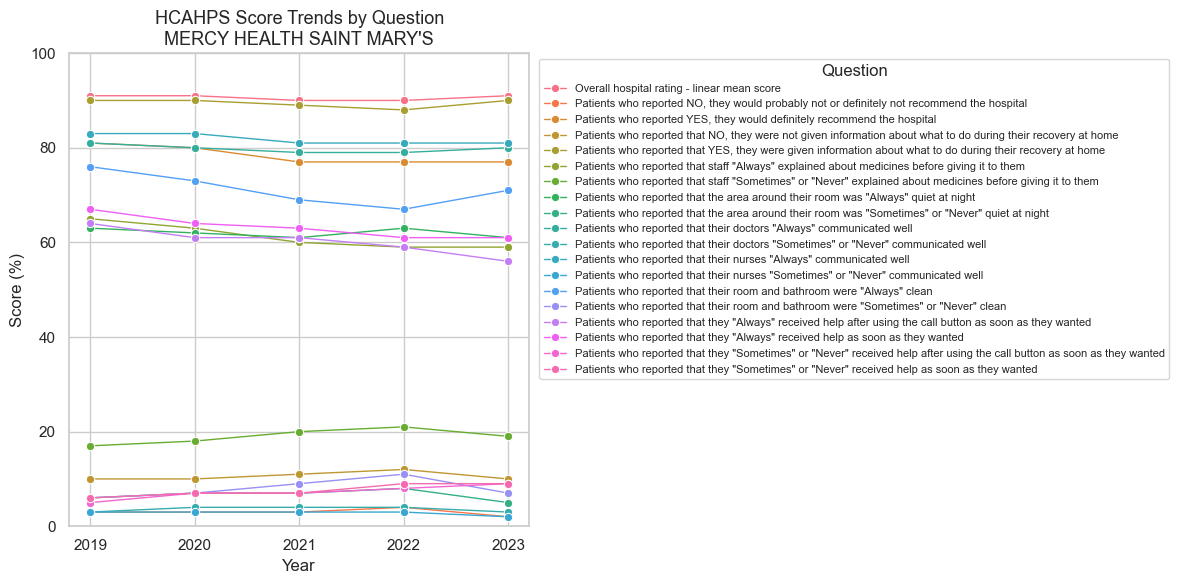

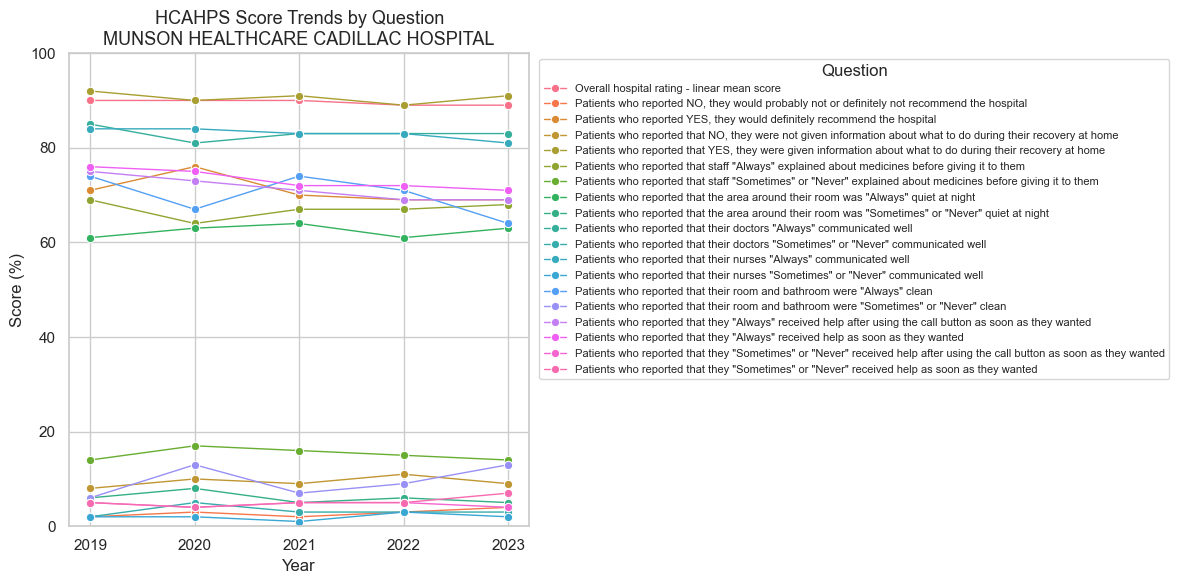

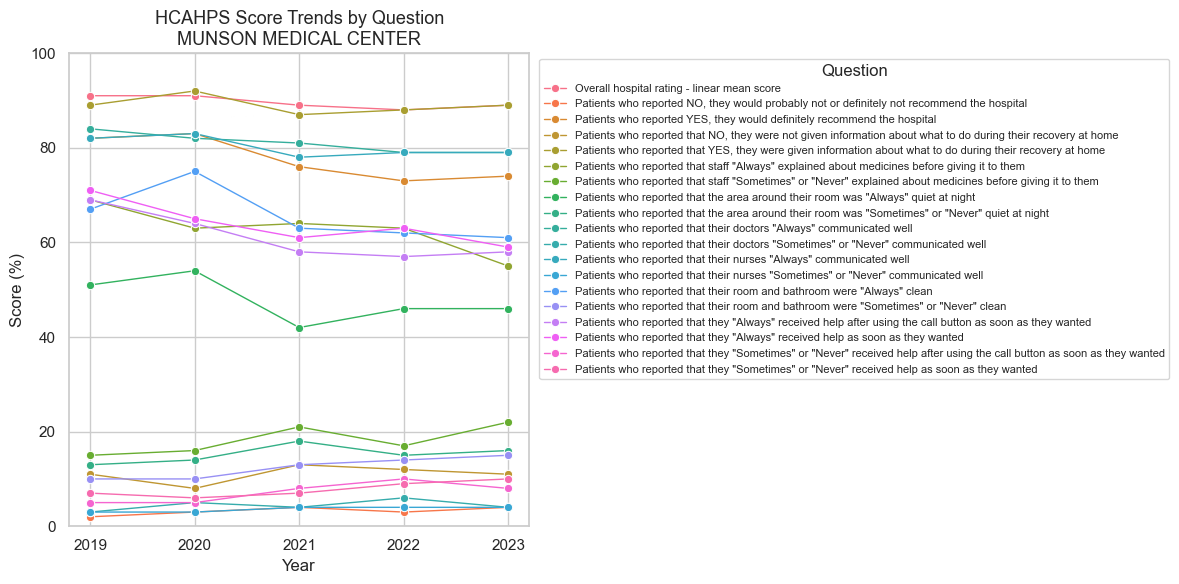

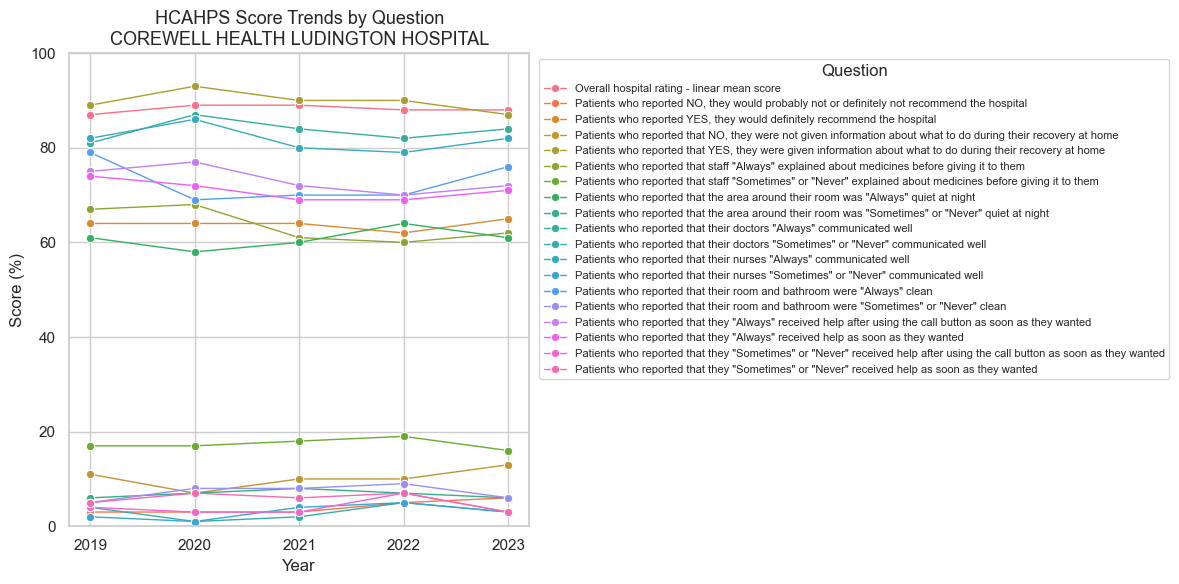

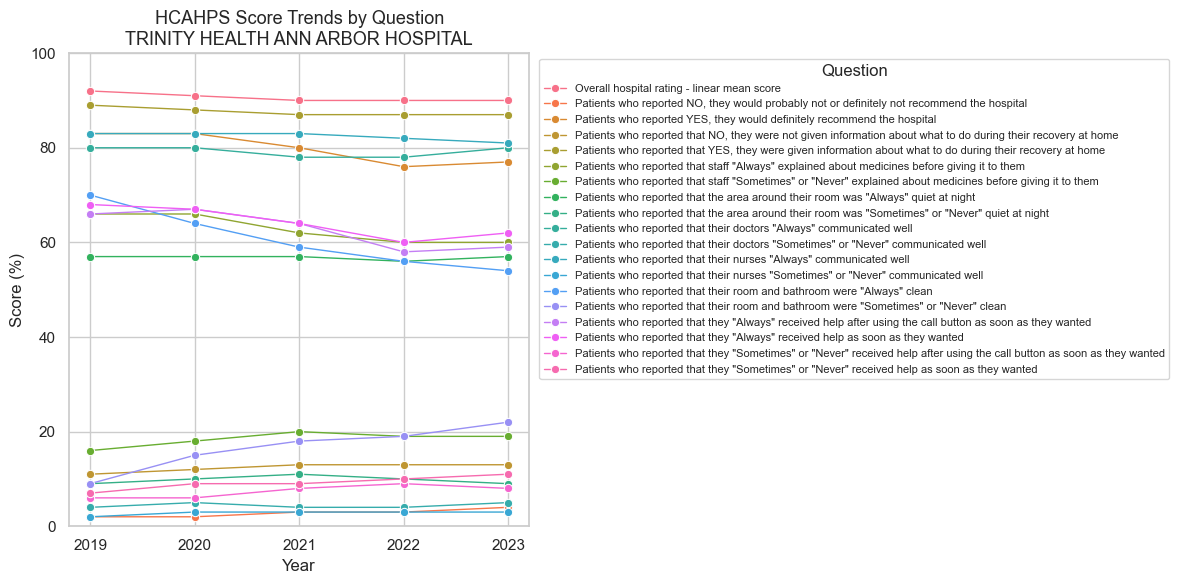

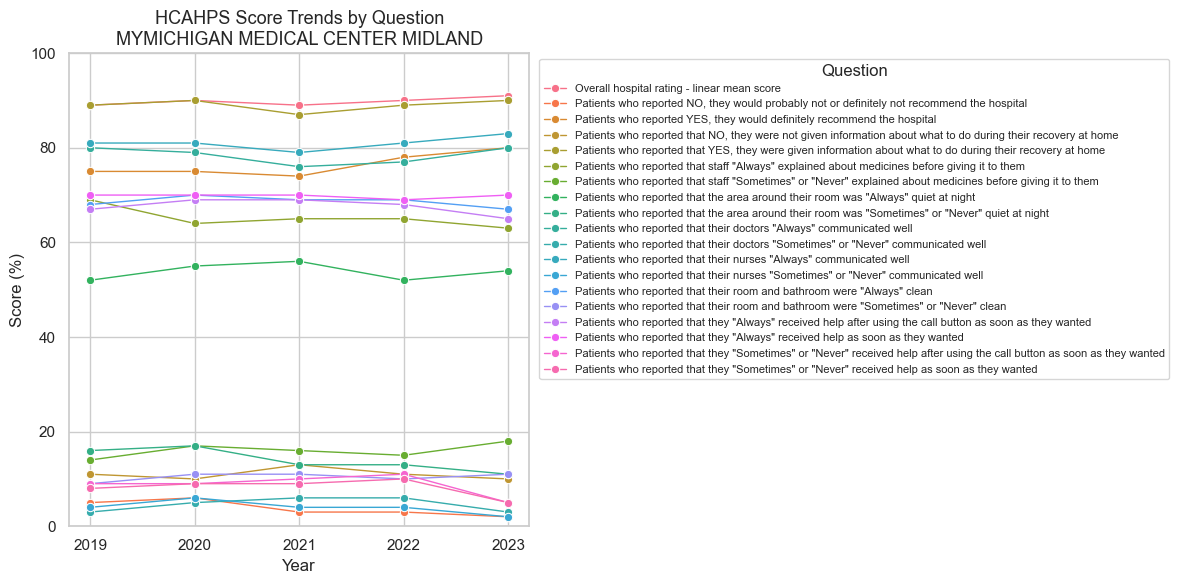

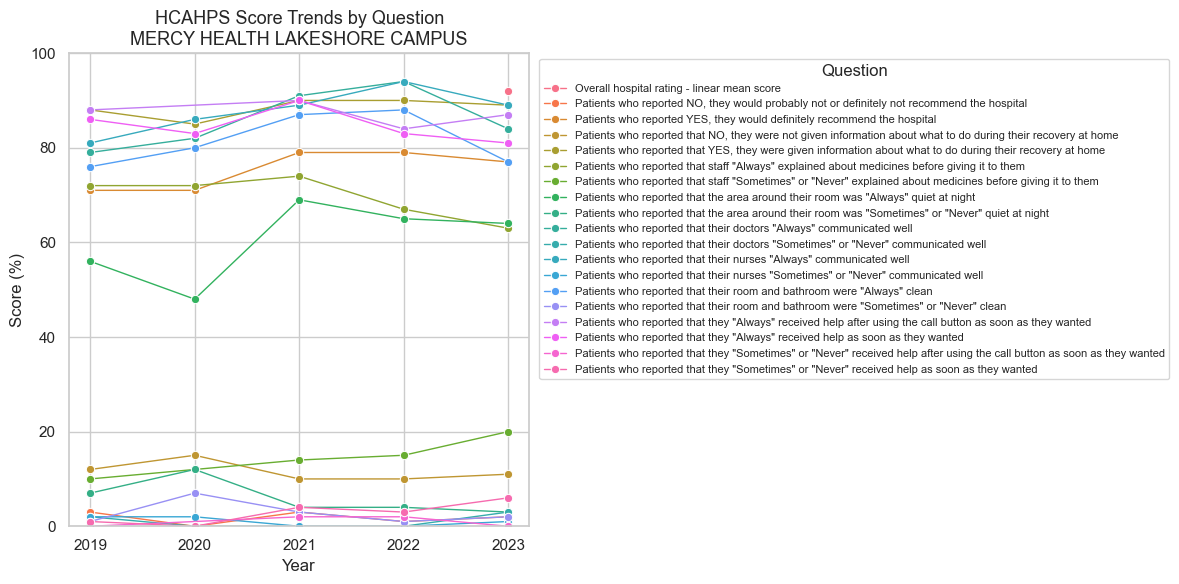

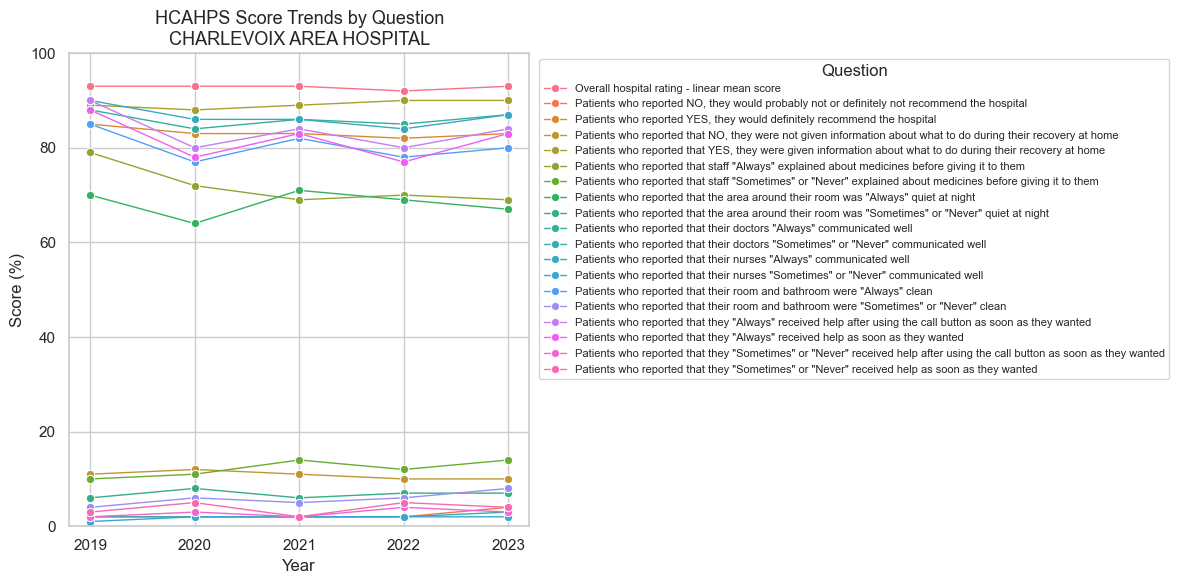

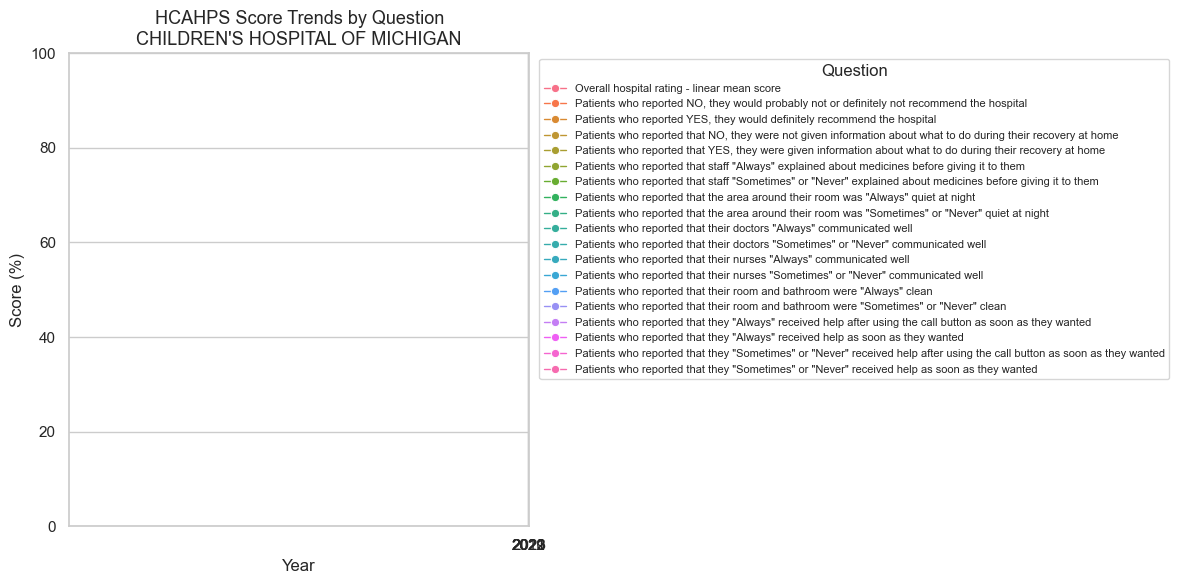

In [84]:

#list of hospitals and target questions
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156,
                230222, 231320, 233300, 230059, 231322, 231322, 233300]

target_questions = [
    'Patients who reported that their nurses "Always" communicated well',
    'Patients who reported that their nurses "Sometimes" or "Never" communicated well',
    'Patients who reported that their doctors "Always" communicated well',
    'Patients who reported that their doctors "Sometimes" or "Never" communicated well',
    'Patients who reported that they "Always" received help as soon as they wanted',
    'Patients who reported that they "Sometimes" or "Never" received help as soon as they wanted',
    'Patients who reported that they "Always" received help after using the call button as soon as they wanted',
    'Patients who reported that they "Sometimes" or "Never" received help after using the call button as soon as they wanted',
    'Patients who reported that staff "Always" explained about medicines before giving it to them',
    'Patients who reported that staff "Sometimes" or "Never" explained about medicines before giving it to them',
    'Patients who reported that YES, they were given information about what to do during their recovery at home',
    'Patients who reported that NO, they were not given information about what to do during their recovery at home',
    'Patients who reported that their room and bathroom were "Always" clean',
    'Patients who reported that their room and bathroom were "Sometimes" or "Never" clean',
    'Patients who reported that the area around their room was "Always" quiet at night',
    'Patients who reported that the area around their room was "Sometimes" or "Never" quiet at night',
    'Patients who reported YES, they would definitely recommend the hospital',
    'Patients who reported NO, they would probably not or definitely not recommend the hospital',
    'Overall hospital rating - linear mean score'
]

# Clean function for all HCAHPS files
def clean_hcahps(df):
    df['Facility ID'] = pd.to_numeric(df['Facility ID'], errors='coerce').astype('Int64')
    df = df[df['Facility ID'].isin(hospital_ids)]
    df['HCAHPS Answer Percent'] = df['HCAHPS Answer Percent'].replace(['Not Applicable', 'Not Available'], np.nan)
    df['HCAHPS Linear Mean Value'] = df['HCAHPS Linear Mean Value'].replace(['Not Applicable', 'Not Available'], np.nan)
    df['HCAHPS Answer Percent'] = pd.to_numeric(df['HCAHPS Answer Percent'], errors='coerce')
    df['HCAHPS Linear Mean Value'] = pd.to_numeric(df['HCAHPS Linear Mean Value'], errors='coerce')
    df['Year'] = pd.to_datetime(df['End Date'], errors='coerce').dt.year
    df = df.dropna(subset=['Year'])
    return df

# Load and clean all years
HCAHPS_dfs = [HCAHPS_2020, HCAHPS_2021, HCAHPS_2022, HCAHPS_2023, HCAHPS_2024]
all_hcahps = pd.concat([clean_hcahps(df) for df in HCAHPS_dfs], ignore_index=True)
all_hcahps = all_hcahps[all_hcahps['HCAHPS Question'].isin(target_questions)]

# Use appropriate score column
all_hcahps['Score'] = np.where(
    all_hcahps['HCAHPS Question'] == 'Overall hospital rating - linear mean score',
    all_hcahps['HCAHPS Linear Mean Value'],
    all_hcahps['HCAHPS Answer Percent']
)

# Use hospital names from 2024
hospital_name_map = HCAHPS_2024[['Facility ID', 'Facility Name']].drop_duplicates()
hospital_name_map['Facility ID'] = pd.to_numeric(hospital_name_map['Facility ID'], errors='coerce').astype('Int64')
all_hcahps = all_hcahps.merge(hospital_name_map, on='Facility ID', how='left', suffixes=('', '_2024'))
all_hcahps['Facility Name'] = all_hcahps['Facility Name_2024']
all_hcahps.drop(columns=['Facility Name_2024'], inplace=True)

# Plotting
sns.set(style="whitegrid")
global_ymin = 0
global_ymax = max(100, all_hcahps['Score'].max())

for hospital in all_hcahps['Facility Name'].dropna().unique():
    plt.figure(figsize=(12, 6))
    data = all_hcahps[all_hcahps['Facility Name'] == hospital].sort_values(['HCAHPS Question', 'Year'])

    # Lineplot: one line per HCAHPS question
    sns.lineplot(
        data=data,
        x='Year',
        y='Score',
        hue='HCAHPS Question',
        marker='o',
        linewidth=1
    )

    plt.title(f"HCAHPS Score Trends by Question\n{hospital}", fontsize=13)
    plt.ylabel("Score (%)")
    plt.xlabel("Year")
    plt.ylim(global_ymin, global_ymax)
    plt.xticks(sorted(data["Year"].unique()))
    plt.legend(title="Question", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)
    plt.tight_layout()

    # safe_name = hospital.replace(" ", "_").replace("/", "_")
    # plt.savefig(f"{safe_name}_HCAHPS_Question_Trends.png", dpi=300, bbox_inches='tight')
    plt.show()


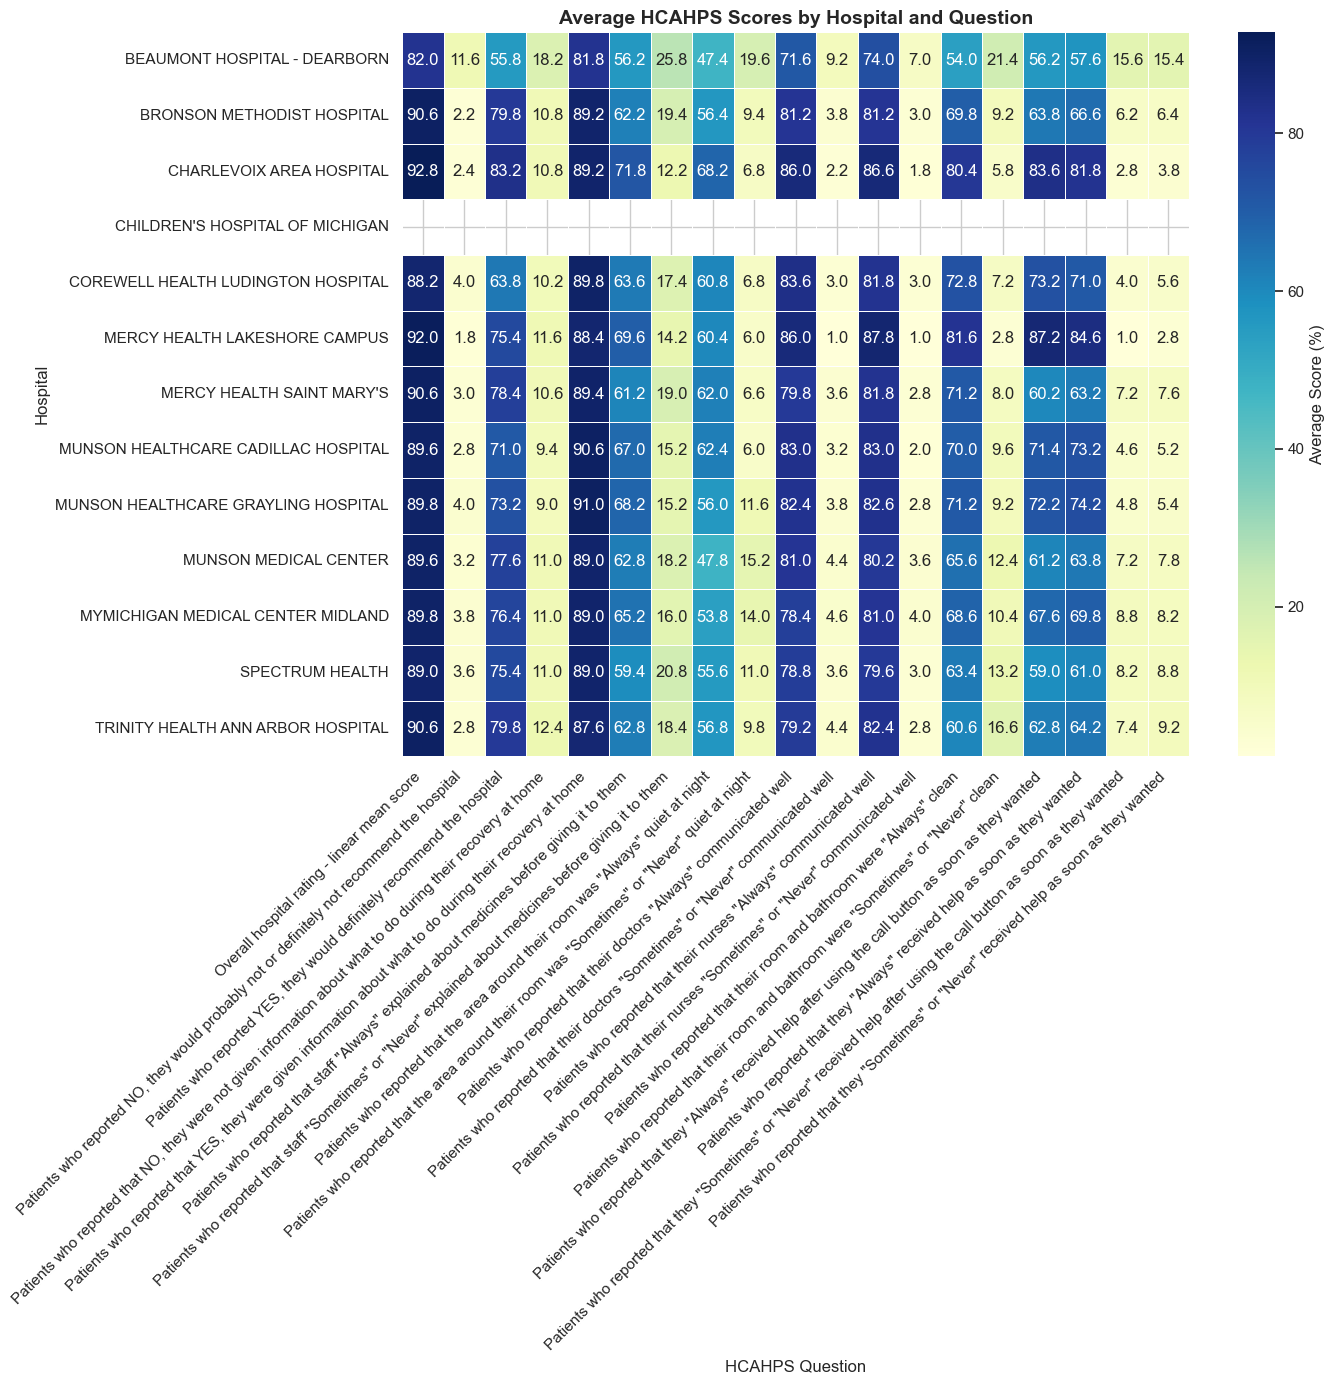

In [73]:

# - 'Facility Name' (from 2024)
# - 'HCAHPS Question'
# - 'Score' column 

# Step 1: Filter to relevant questions (if not already done)
# #target_questions = [
#     'Patients who reported that their nurses "Always" communicated well',
#     'Patients who reported that their nurses "Sometimes" or "Never" communicated well',
#     'Patients who reported that their doctors "Always" communicated well',
#     'Patients who reported that their doctors "Sometimes" or "Never" communicated well',
#     'Patients who reported that they "Always" received help as soon as they wanted',
#     'Patients who reported that they "Sometimes" or "Never" received help as soon as they wanted',
#     'Patients who reported that they "Always" received help after using the call button as soon as they wanted',
#     'Patients who reported that they "Sometimes" or "Never" received help after using the call button as soon as they wanted',
#     'Patients who reported that staff "Always" explained about medicines before giving it to them',
#     'Patients who reported that staff "Sometimes" or "Never" explained about medicines before giving it to them',
#     'Patients who reported that YES, they were given information about what to do during their recovery at home',
#     'Patients who reported that NO, they were not given information about what to do during their recovery at home',
#     'Patients who reported that their room and bathroom were "Always" clean',
#     'Patients who reported that their room and bathroom were "Sometimes" or "Never" clean',
#     'Patients who reported that the area around their room was "Always" quiet at night',
#     'Patients who reported that the area around their room was "Sometimes" or "Never" quiet at night',
#     'Patients who reported YES, they would definitely recommend the hospital',
#     'Patients who reported NO, they would probably not or definitely not recommend the hospital',
#     'Overall hospital rating - linear mean score'
# ]

filtered_df = all_hcahps[all_hcahps['HCAHPS Question'].isin(target_questions)]

# Step 2: Compute average score per hospital and question
avg_scores = (
    filtered_df.groupby(['Facility Name', 'HCAHPS Question'], as_index=False)
    .agg(Average_Score=('Score', 'mean'))
)

# Step 3: Pivot the table for heatmap format
heatmap_data = avg_scores.pivot(index='Facility Name', columns='HCAHPS Question', values='Average_Score')

# Step 4: Plot heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Average Score (%)'}
)

plt.title("Average HCAHPS Scores by Hospital and Question", fontsize=14, weight='bold')
plt.xlabel("HCAHPS Question")
plt.ylabel("Hospital")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("HCAHPS_Heatmap_Average_Scores.png", dpi=400)
plt.show()
